In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
from lightgbm import LGBMRegressor, LGBMClassifier
from imblearn.over_sampling import SMOTE

# from tensorflow_core.estimator import inputs

#Hiding the warnings
warnings.filterwarnings('ignore') 

In [182]:
path_to_dataset = '/Users/mihaithpc/Desktop/Europe_Datathon/'
df = pd.read_csv(path_to_dataset + "DataAfterFE_310_3.csv", index_col=[0])

In [183]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

###
[1]	valid_0's l2: 2.24316
[2]	valid_0's l2: 2.24304
[3]	valid_0's l2: 2.24342
[4]	valid_0's l2: 2.24359
[5]	valid_0's l2: 2.24403
[6]	valid_0's l2: 2.24491
[7]	valid_0's l2: 2.24456
[8]	valid_0's l2: 2.24454
[9]	valid_0's l2: 2.24459
[10]	valid_0's l2: 2.2441
[11]	valid_0's l2: 2.24455
[12]	valid_0's l2: 2.24401
[13]	valid_0's l2: 2.2442
[14]	valid_0's l2: 2.24434
[15]	valid_0's l2: 2.24445
[16]	valid_0's l2: 2.24435
[17]	valid_0's l2: 2.24412
[18]	valid_0's l2: 2.24434
[19]	valid_0's l2: 2.24449
[20]	valid_0's l2: 2.24475
[21]	valid_0's l2: 2.24498
[22]	valid_0's l2: 2.24633
###
[1]	valid_0's l2: 2.23747
[2]	valid_0's l2: 2.23744
[3]	valid_0's l2: 2.23755
[4]	valid_0's l2: 2.23705
[5]	valid_0's l2: 2.23716
[6]	valid_0's l2: 2.23703
[7]	valid_0's l2: 2.2377
[8]	valid_0's l2: 2.23716
[9]	valid_0's l2: 2.23742
[10]	valid_0's l2: 2.23762
[11]	valid_0's l2: 2.23696
[12]	valid_0's l2: 2.23762
[13]	valid_0's l2: 2.23773
[14]	valid_0's l2: 2.23751
[15]	valid_0's l2: 2.23753
[16]	valid_0's

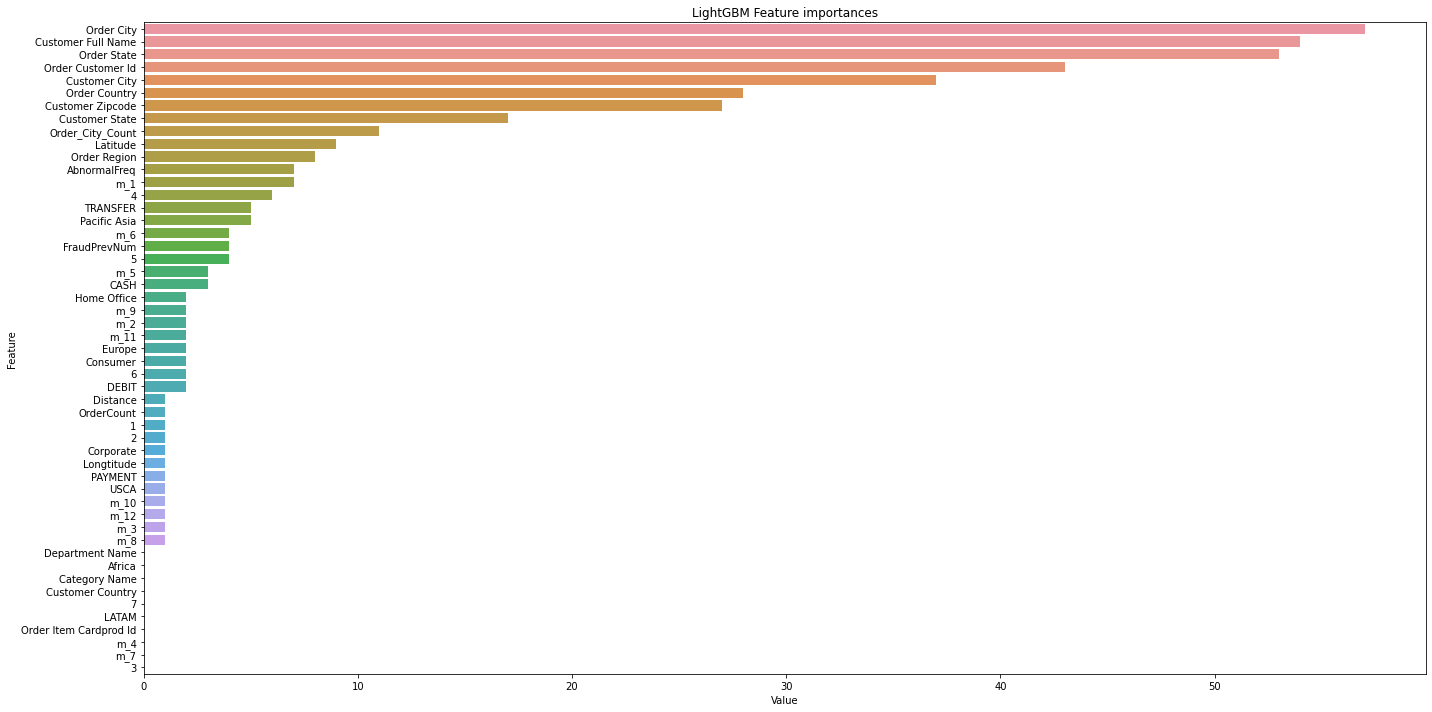

In [184]:
features_d = ['Order Item Cardprod Id', 'Order Customer Id',
       'Order City', 'Order Country', 'Order Region',
       'Order State',
       'Department Name', 'Customer City', 'Customer Country',
       'Customer State', 'Customer Zipcode', 'Customer Full Name',
       'Category Name', 'Latitude',
       'Longtitude', 'Distance', 'Order_City_Count', 'FraudPrevNum',
       'AbnormalFreq', 'OrderCount', 'CASH', 'DEBIT', 'PAYMENT',
       'TRANSFER', 'Consumer', 'Corporate', 'Home Office', 'Africa',
       'Europe', 'LATAM', 'Pacific Asia', 'USCA', '1', '2', '3', '4', '5', '6',
       '7', 'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9',
       'm_10', 'm_11', 'm_12']

X = df[features_d]
y = df['DelayDays']

# for i in range(len(yd)):
#     if yd[i] <= 0:
#         yd[i] = 0
#     else:
#         yd[i] = 1

le = preprocessing.LabelEncoder()
X['Category Name']  = le.fit_transform(X['Category Name'])
X['Customer Full Name']  = le.fit_transform(X['Customer Full Name'])
X['Customer State']  = le.fit_transform(X['Customer State'])
X['Customer Country']  = le.fit_transform(X['Customer Country'])
X['Customer City']  = le.fit_transform(X['Customer City'])
X['Department Name']  = le.fit_transform(X['Department Name'])
#X['Order Status']  = le.fit_transform(X['Order Status'])
X['Order Region']  = le.fit_transform(X['Order Region'])
X['Order State']  = le.fit_transform(X['Order State'])
X['Order Country']  = le.fit_transform(X['Order Country'])
X['Order City']  = le.fit_transform(X['Order City'])

thr = int(0.8 * len(X))
train_xd, test_xd = X[:thr], X[thr:]
train_yd, test_yd = y[:thr], y[thr:]


sc = MinMaxScaler()
train_xd=sc.fit_transform(train_xd)
test_xd=sc.transform(test_xd)


train_yd = train_yd.astype('int')
test_yd = test_yd.astype('int')

model = LGBMRegressor()
kf = KFold(n_splits=5, shuffle=False)
for train_index, test_index in kf.split(X, y):
    print("###")
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
            early_stopping_rounds=20)
    
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature importances')
plt.tight_layout()
plt.show()
#plt.savefig("delay_days_profit.svg")

def regressionmodel(model_d, xd_train, xd_test, yd_train, yd_test):
    model_d=model_d.fit(xd_train,yd_train)#Fitting train data for sales
    yd_pred=model_d.predict(xd_test)#predicting sales with test data
    print('Model parameter used are:', model_d) #Printing the model to see which parameters are used
    #Printing mean absolute error for predicting sales
    print("MAE of delay days is         :", metrics.mean_absolute_error(yd_test,yd_pred))
    #Printing Root mean squared error for predicting sales
    print("RMSE of delay days is        :",np.sqrt(metrics.mean_squared_error(yd_test,yd_pred)))

In [165]:
model_d = linear_model.Lasso(alpha=0.1)
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: Lasso(alpha=0.1)
MAE of delay days is         : 1.1977322752622914
RMSE of delay days is        : 1.4845101152531388


In [166]:
model_d = Ridge(alpha=1.0)
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: Ridge()
MAE of delay days is         : 1.1977031952710575
RMSE of delay days is        : 1.4855478780374998


In [167]:
model_d = lgb.LGBMRegressor()
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: LGBMRegressor()
MAE of delay days is         : 1.194755045956663
RMSE of delay days is        : 1.488611473804718


In [168]:
model_d = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of delay days is         : 1.1967408074519477
RMSE of delay days is        : 1.4865573166017034


In [169]:
model_d = xgb.XGBRegressor()
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE of delay days is         : 1.2191047023705317
RMSE of delay days is        : 1.5288232890925606


In [170]:
model_d = tree.DecisionTreeRegressor()
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: DecisionTreeRegressor()
MAE of delay days is         : 1.7093988907210313
RMSE of delay days is        : 2.191375964183084


In [171]:
model_d=LinearRegression()
regressionmodel(model_d, train_xd, test_xd, train_yd, test_yd)

Model parameter used are: LinearRegression()
MAE of delay days is         : 1.1977656027488384
RMSE of delay days is        : 1.4855672487409721


In [60]:
print(train_xd.shape)
print(test_xd.shape)
print(train_yd.shape)
print(test_yd.shape)

(133418, 69)
(33355, 69)
(133418,)
(33355,)


In [66]:
X

Order Item Cardprod Id  Order Customer Id  Order Department Id  \
0                          403               5225                    4   
1                          134               1837                    2   
2                          957               4189                    7   
3                          365               1205                    4   
4                          403               4840                    4   
...                        ...                ...                  ...   
166768                     191               5420                    3   
166769                     191               1725                    3   
166770                     191               9316                    3   
166771                     191               1725                    3   
166772                     627               1273                    5   

        Order City  Order Country  Order Region  Order State  Department Name  \
0             2031             33            12           46                0   
1             1946            105             3          616                2   
2             3122             66             3          346                1   
3             2814            112             3          783                0   
4             2063            102             3          292                0   
...            ...            ...           ...          ...              ...   
166768        2451            120            10          454                3   
166769        1286              2            22          410                3   
166770        1286              2            22          410                3   
166771        1286              2            22          410                3   
166772        1015            141            10          334                4   

        Customer City  Customer Country  ...  m_3  m_4  m_5  m_6  m_7  m_8  \
0                 385                 0  ...    0    0    0    0    0    0   
1                  65                 1  ...    0    0    0    0    0    0   
2                 284                 0  ...    0    0    0    0    0    0   
3                 317                 0  ...    0    0    0    0    0    0   
4                 234                 0  ...    0    0    0    0    0    0   
...               ...               ...  ...  ...  ...  ...  ...  ...  ...   
166768            336                 0  ...    0    0    0    0    0    1   
166769             59                 0  ...    0    0    0    0    0    1   
166770             65                 1  ...    0    0    0    0    0    1   
166771             59                 0  ...    0    0    0    0    0    1   
166772             65                 1  ...    0    0    0    0    0    1   

        m_9  m_10  m_11  m_12  
0         0     0     0     0  
1         0     0     0     0  
2         0     0     0     0  
3         0     0     0     0  
4         0     0     0     0  
...     ...   ...   ...   ...  
166768    0     0     0     0  
166769    0     0     0     0  
166770    0     0     0     0  
166771    0     0     0     0  
166772    0     0     0     0  

[166773 rows x 48 columns]

In [96]:
for i in range(len(y)):
    if y[i] > 0:  # real > scheduled so delay
        y[i] = 1
    else:
        y[i] = 0 



###
[1]	valid_0's multi_logloss: 1.73851
[2]	valid_0's multi_logloss: 1.73861
[3]	valid_0's multi_logloss: 1.73907
[4]	valid_0's multi_logloss: 1.73908
[5]	valid_0's multi_logloss: 1.73936
[6]	valid_0's multi_logloss: 1.73953
[7]	valid_0's multi_logloss: 1.73959
[8]	valid_0's multi_logloss: 1.74
[9]	valid_0's multi_logloss: 1.74054
[10]	valid_0's multi_logloss: 1.74063
[11]	valid_0's multi_logloss: 1.74088
[12]	valid_0's multi_logloss: 1.74091
[13]	valid_0's multi_logloss: 1.7414
[14]	valid_0's multi_logloss: 1.74163
[15]	valid_0's multi_logloss: 1.74201
[16]	valid_0's multi_logloss: 1.74201
[17]	valid_0's multi_logloss: 1.74239
[18]	valid_0's multi_logloss: 1.74256
[19]	valid_0's multi_logloss: 1.74318
[20]	valid_0's multi_logloss: 1.74351
[21]	valid_0's multi_logloss: 1.74362
###
[1]	valid_0's multi_logloss: 1.73533
[2]	valid_0's multi_logloss: 1.73536
[3]	valid_0's multi_logloss: 1.73513
[4]	valid_0's multi_logloss: 1.7357
[5]	valid_0's multi_logloss: 1.73604
[6]	valid_0's multi_log

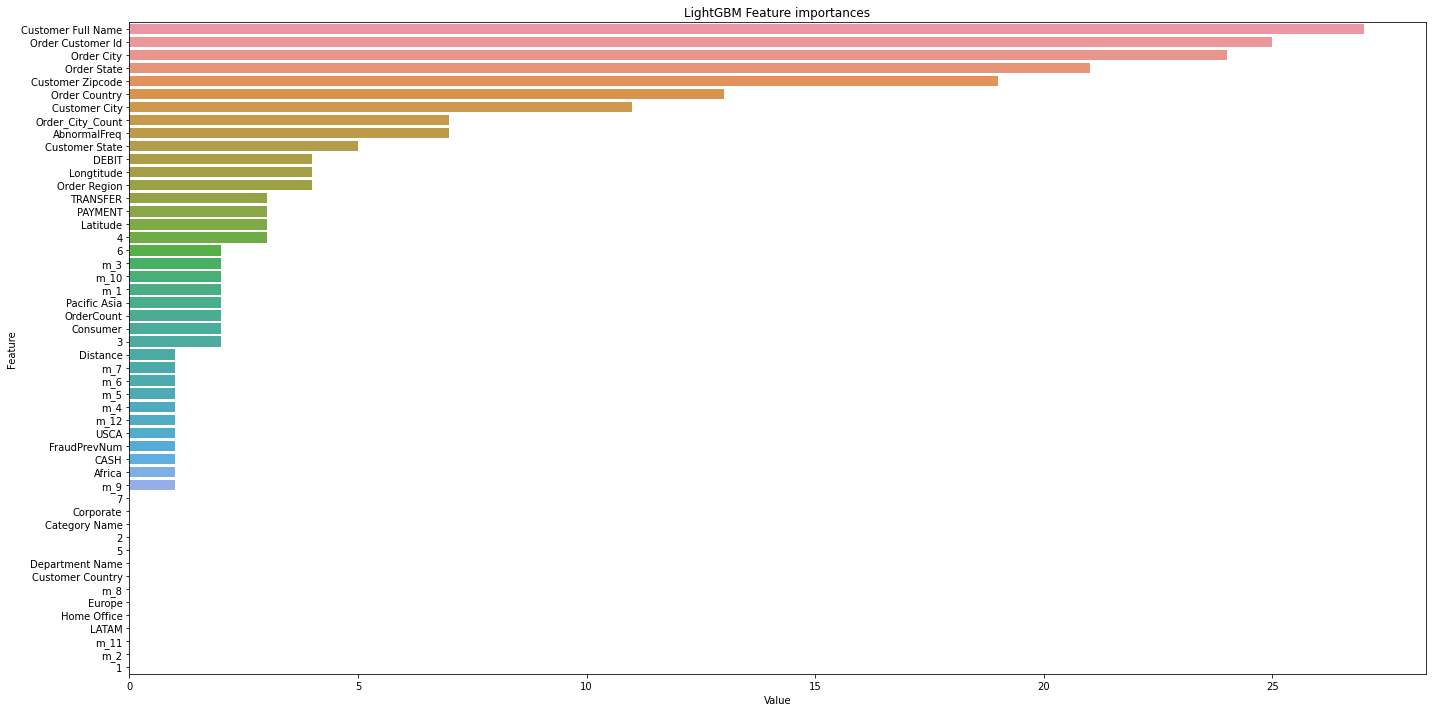

In [24]:
model = LGBMClassifier()
kf = KFold(n_splits=5, shuffle=False)
for train_index, test_index in kf.split(X, y):
    print("###")
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
            early_stopping_rounds=20)
    
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature importances')
plt.tight_layout()
plt.show()

In [151]:
y.value_counts()


 1    55944
 0    31227
 2    26565
-1    20088
-2    19963
 3     6554
 4     6432
Name: DelayDays, dtype: int64

In [128]:
regressor = Sequential()

#First Hidden Layer
regressor.add(Dense(512, activation='relu',kernel_initializer='normal',input_dim=51))
#Second  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Third  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fourth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fifth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))

#Output Layer
regressor.add(Dense(1, activation='linear'))# Linear activation is used.

regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

regressor.fit(train_xd, train_yd, batch_size=256, epochs=50)

#pred_d = regressor.predict(test_xd)
# print('MAE Value test data:',regressor.evaluate(test_xd, pred_d))
# print('RMSE of test data:',np.sqrt(mean_squared_error(test_yd, pred_d)))

Epoch 1/50
522/522 [==============================] - 3s 4ms/step - loss: 2.2320 - mean_squared_error: 2.2320
Epoch 2/50
522/522 [==============================] - 2s 5ms/step - loss: 2.2133 - mean_squared_error: 2.2133
Epoch 3/50
522/522 [==============================] - 2s 4ms/step - loss: 2.1774 - mean_squared_error: 2.1774
Epoch 4/50
522/522 [==============================] - 2s 5ms/step - loss: 2.0912 - mean_squared_error: 2.0912
Epoch 5/50
522/522 [==============================] - 2s 4ms/step - loss: 1.9258 - mean_squared_error: 1.9258
Epoch 6/50
522/522 [==============================] - 2s 4ms/step - loss: 1.6703 - mean_squared_error: 1.6703
Epoch 7/50
522/522 [==============================] - 2s 4ms/step - loss: 1.3762 - mean_squared_error: 1.3762
Epoch 8/50
522/522 [==============================] - 2s 4ms/step - loss: 1.0914 - mean_squared_error: 1.0914
Epoch 9/50
522/522 [==============================] - 2s 4ms/step - loss: 0.8619 - mean_squared_error: 0.8619
Epoch 10/5

In [129]:
print(abs(regressor.predict(test_xd).reshape(-1) - test_yd).sum() / len(test_yd))
print(np.sqrt(((regressor.predict(test_xd).reshape(-1) - test_yd)**2)).sum())

1.4678532906600363
48960.24650996551


In [130]:
48960.24650996551/len(test_yd)

1.4678532906600363

In [155]:
np.sqrt(((regressor.predict(test_xd).reshape(-1) - test_yd)**2).sum()/ len(test_yd))

1.86730225947004

In [144]:
abs(regressor.predict(test_xd).reshape(-1) - test_yd).sum() / len(test_yd)

1.4678532906600363

In [148]:
abs(regressor.predict(test_xd).reshape(-1) - test_yd).sum()

48960.24650996551

In [152]:
((regressor.predict(test_xd).reshape(-1) - test_yd)**2).sum()/len(test_yd)

3.486817728221916

In [174]:
classification_data = {'Classification Model':  ['Lasso','Ridge','LGBMRegressor','Random Forest',
                                'XGBRegressor','Decision Tree','Linear Regression'],   
        'MAE':       [1.1977, 1.1977, 1.1947, 1.1967, 1.2191, 1.7093, 1.1977],
        'RMSE':         [1.4875, 1.4855, 1.4886, 1.4865, 1.5288, 2.1913, 1.4855]}
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model',
                                                                           'MAE',
                                                                           'RMSE'])
                                                                           

In [175]:
classification_comparision

Classification Model     MAE    RMSE
0                Lasso  1.1977  1.4875
1                Ridge  1.1977  1.4855
2        LGBMRegressor  1.1947  1.4886
3        Random Forest  1.1967  1.4865
4         XGBRegressor  1.2191  1.5288
5        Decision Tree  1.7093  2.1913
6    Linear Regression  1.1977  1.4855

In [176]:
print(classification_comparision.to_latex())

\begin{tabular}{llrr}
\toprule
{} & Classification Model &     MAE &    RMSE \\
\midrule
0 &                Lasso &  1.1977 &  1.4875 \\
1 &                Ridge &  1.1977 &  1.4855 \\
2 &        LGBMRegressor &  1.1947 &  1.4886 \\
3 &        Random Forest &  1.1967 &  1.4865 \\
4 &         XGBRegressor &  1.2191 &  1.5288 \\
5 &        Decision Tree &  1.7093 &  2.1913 \\
6 &    Linear Regression &  1.1977 &  1.4855 \\
\bottomrule
\end{tabular}

